# IoU Example

In the image below, the blue bounding box is the detected object. Given that the Ground Truth is known (shown in red), let us see how to implement IoU calculation using NumPy and PyTorch. We will see the available in-built function and define manual functions as well.

In the order of top left to bottom right corner, the coordinates are,

☑ Ground truth [1202, 123, 1650, 868]

☑ Prediction [1162.0001, 92.0021, 1619.9832, 694.0033]

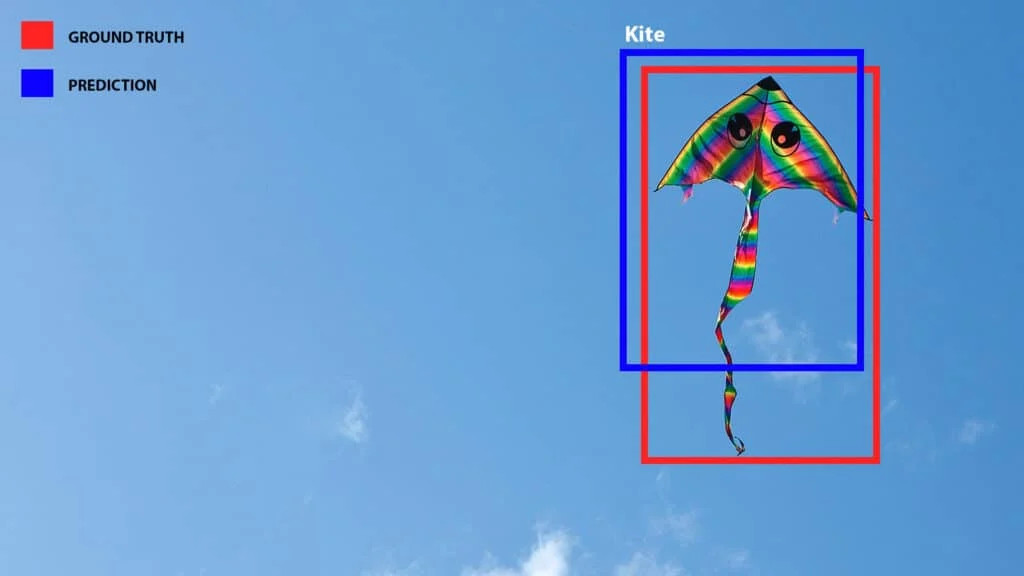

In [1]:
from IPython.display import Image
Image(filename="pic/6-kites-iou-calculate-1024x576.jpg")

## Implementing Intersection over Union using NumPy

In [2]:
import numpy as np

def get_iou(ground_truth, pred):
    # coordinates of the area of intersection.
    ix1 = np.maximum(ground_truth[0], pred[0])
    iy1 = np.maximum(ground_truth[1], pred[1])
    ix2 = np.minimum(ground_truth[2], pred[2])
    iy2 = np.minimum(ground_truth[3], pred[3])
     
    # Intersection height and width.
    i_height = np.maximum(iy2 - iy1 + 1, np.array(0.))
    i_width = np.maximum(ix2 - ix1 + 1, np.array(0.))
     
    area_of_intersection = i_height * i_width
     
    # Ground Truth dimensions.
    gt_height = ground_truth[3] - ground_truth[1] + 1
    gt_width = ground_truth[2] - ground_truth[0] + 1
     
    # Prediction dimensions.
    pd_height = pred[3] - pred[1] + 1
    pd_width = pred[2] - pred[0] + 1
     
    area_of_union = gt_height * gt_width + pd_height * pd_width - area_of_intersection
     
    iou = area_of_intersection / area_of_union
     
    return iou

In [3]:
ground_truth_bbox = np.array([1202, 123, 1650, 868], dtype=np.float32)
 
prediction_bbox = np.array([1162.0001, 92.0021, 1619.9832, 694.0033], dtype=np.float32)

iou = get_iou(ground_truth_bbox, prediction_bbox)
print('IOU: ', iou)

IOU:  0.6441399913136432


## PyTorch Built-In Function for IoU

Pytorch already has a built-in function `box_iou` to calculate IoU. Documentation in the Reference section. It takes the set of bounding boxes as inputs and returns an IoU tensor.

In [9]:
# Import dependencies.
import torch
from torchvision import ops
 
# Bounding box coordinates.
ground_truth_bbox = torch.tensor([[1202, 123, 1650, 868]], dtype=torch.float)
prediction_bbox = torch.tensor([[1162.0001, 92.0021, 1619.9832, 694.0033]], dtype=torch.float)
 
# Get iou.
iou = ops.box_iou(ground_truth_bbox, prediction_bbox)
print('IOU : ', iou.numpy()[0][0])

IOU :  0.6436676


## Implementing IoU by defining a function in PyTorch

In [4]:
import torch

def get_iou_torch(ground_truth, pred):
    # Coordinates of the area of intersection.
    ix1 = torch.max(ground_truth[0][0], pred[0][0])
    iy1 = torch.max(ground_truth[0][1], pred[0][1])
    ix2 = torch.min(ground_truth[0][2], pred[0][2])
    iy2 = torch.min(ground_truth[0][3], pred[0][3])
    
    # Intersection height and width.
    i_height = torch.max(iy2 - iy1 + 1, torch.tensor(0.))
    i_width = torch.max(ix2 - ix1 + 1, torch.tensor(0.))
    
    area_of_intersection = i_height * i_width
    
    # Ground Truth dimensions.
    gt_height = ground_truth[0][3] - ground_truth[0][1] + 1
    gt_width = ground_truth[0][2] - ground_truth[0][0] + 1
    
    # Prediction dimensions.
    pd_height = pred[0][3] - pred[0][1] + 1
    pd_width = pred[0][2] - pred[0][0] + 1
    
    area_of_union = gt_height * gt_width + pd_height * pd_width - area_of_intersection
    
    iou = area_of_intersection / area_of_union
    
    return iou

In [8]:
ground_truth_bbox = torch.tensor([[1202, 123, 1650, 868]], dtype=torch.float)
 
prediction_bbox = torch.tensor([[1162.0001, 92.0021, 1619.9832, 694.0033]], dtype=torch.float)

iou_val = get_iou_torch(ground_truth_bbox, prediction_bbox)
print('IOU : ', iou_val.numpy())

IOU :  0.64413995
